Adjusted Rand Score: 0.28701164762868353
Noise Adjusted Rand Score: 0.3799820012465683


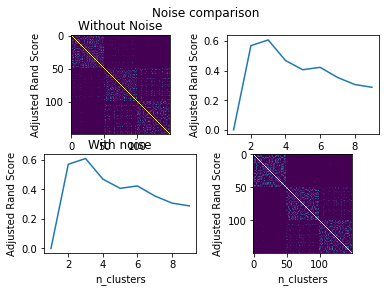

In [30]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
X1 = iris.data
X = iris.data + (np.random.rand(150,4))
#print(X.shape)
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)

clf1 = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

clf1.fit(X1)

sim_mat = clf.transform()
sim_mat1 = clf1.transform()

#print(sim_mat)
#print(sim_mat1)

fig, axs = plt.subplots(2,2)
fig.suptitle('Noise comparison')
axs[0,0].imshow(sim_mat)
axs[1,1].imshow(sim_mat1)
axs[0,0].set_title('Without Noise')
axs[1,0].set_title('With noise')


R = []
I = []
for i in range (1,10):
    I.append(i)
    cluster = AgglomerativeClustering(n_clusters=i, 
                                      memory=None, 
                                      connectivity=None)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(iris.target, predict_labels)
    R.append(score)

K = []
O = []
for i in range (1,10):
    O.append(i)
    cluster = AgglomerativeClustering(n_clusters=i, 
                                      memory=None, 
                                      connectivity=None)
    predict_labels1 = cluster.fit_predict(sim_mat1)
    score1 = adjusted_rand_score(iris.target, predict_labels1)
    K.append(score1)

axs[0,1].plot(I,R)
axs[1,0].plot(I,R)
for ax in axs.flat:
    ax.set(ylabel='Adjusted Rand Score', xlabel='n_clusters')



#print("labels\n", iris.target)
#print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)
print("Noise Adjusted Rand Score:", score1)


Average Adjusted Rand Scores: 0.27083292410479304
Variance of Adjusted Rand Scores 0.027751879440463995


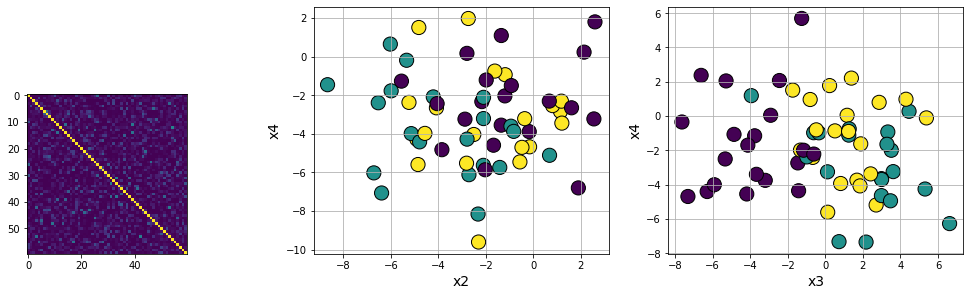

In [56]:
from sklearn.datasets import make_blobs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
scores = []


plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=2.5, 
                       center_box=(-5.0, 5.0), shuffle=True, random_state=None)
    df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
    df4['y'] = data4[1]

    from itertools import combinations
    from math import ceil
    
    lst_var=list(combinations(df4.columns[:-1],2))
    len_var = len(lst_var)
    plt.subplot(2,ceil(len_var/2),i)
    
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    data = plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)
    
    X = data4[0]
    Y = data4[1]
    
    clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    plt.subplot(3, 3, i+1)
    plt.imshow(sim_mat)
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)

    scores.append(score)

print("Average Adjusted Rand Scores:", np.mean(scores))
print("Variance of Adjusted Rand Scores", np.var(scores))